In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv 
df_match=pd.read_csv("IPL Matches 2008-2020.csv")


In [3]:
df_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
df_match.shape

(816, 17)

In [5]:
#changing team name 
x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

df_match.replace(x,y,inplace=True)

Text(0.5, 1.0, 'Match and Toss Winner')

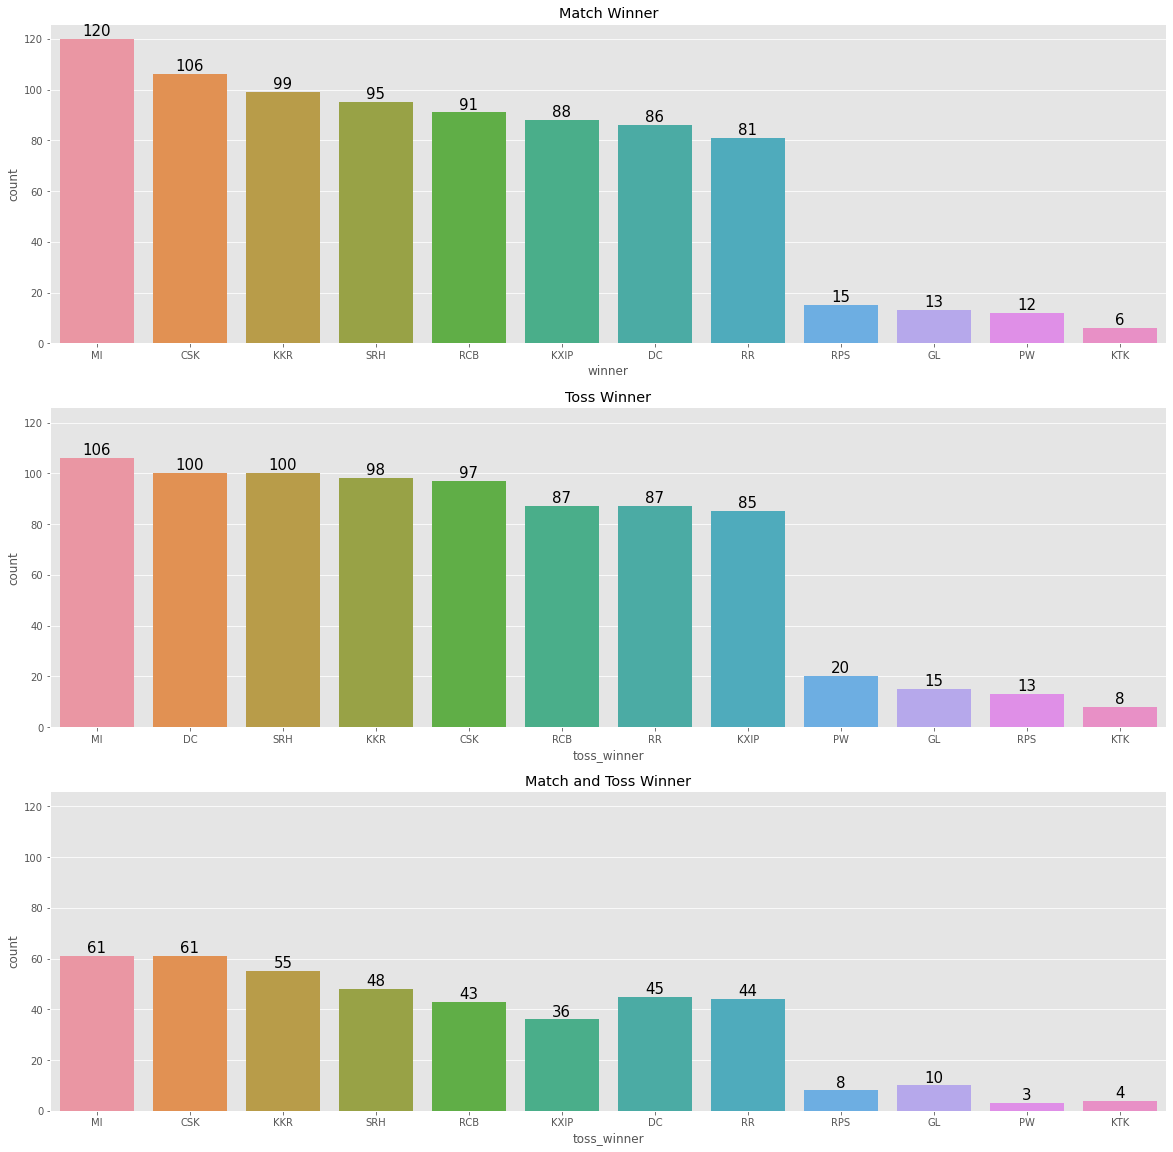

In [6]:
#ploting countplot for analysis
from matplotlib import style # for style 
style.use("ggplot") 
fig, ax = plt.subplots(3, 1, figsize=(20,20), sharey=True)


#Ploting total won match by teams
plot1=sns.countplot(ax=ax[0],x='winner',data=df_match,order=df_match['winner'].value_counts().index)
for count in plot1.patches:
    
    plot1.annotate(format(count.get_height(), '.0f'), 
                   (count.get_x() + count.get_width() / 2, 
                    count.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
ax[0].set_title("Match Winner")


#ploting total number of toss won team
plot2=sns.countplot(ax=ax[1],x='toss_winner',data=df_match,order=df_match['toss_winner'].value_counts().index)
for count in plot2.patches:
    
    plot2.annotate(format(count.get_height(), '.0f'), 
                   (count.get_x() + count.get_width() / 2, 
                    count.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
ax[1].set_title("Toss Winner")

#ploting total MAtch and toss winner
plot3=sns.countplot(ax=ax[2],x='toss_winner',data=df_match[df_match['winner']==df_match['toss_winner']],order=df_match['winner'].value_counts().index)
for count in plot3.patches:
    
    plot3.annotate(format(count.get_height(), '.0f'), 
                   (count.get_x() + count.get_width() / 2, 
                    count.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
ax[2].set_title("Match and Toss Winner")



In [7]:
#groping for find , which team chose more time bat or field
TW=df_match.groupby('toss_winner')['toss_decision'].value_counts(normalize=True)*100

In [8]:
TW = TW.rename('percent').reset_index()


In [9]:
TW

,toss_winner,toss_decision,percent
0,CSK,bat,52.577320
1,CSK,field,47.422680
2,DC,field,64.000000
3,DC,bat,36.000000
4,GL,field,93.333333
5,GL,bat,6.666667
6,KKR,field,65.306122
7,KKR,bat,34.693878
8,KTK,field,62.500000
9,KTK,bat,37.500000


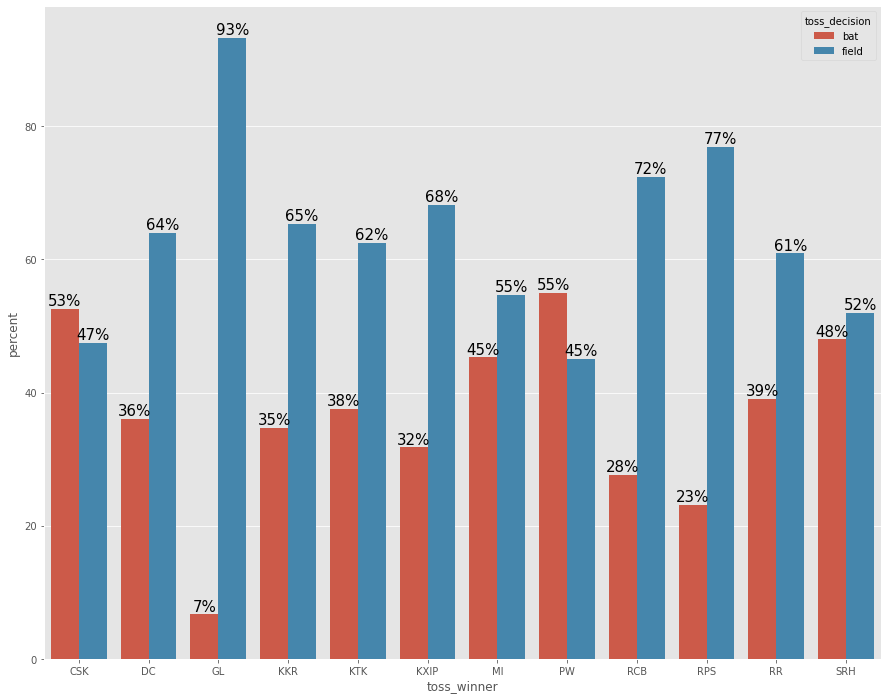

In [10]:
#plotung conclusion
plt.figure(figsize=(15,12))
toss=sns.barplot(x='toss_winner',y='percent',data=TW,hue='toss_decision')
for count in toss.patches:
    
    toss.annotate(format(count.get_height(), '.0f')+'%', 
                   (count.get_x() + count.get_width() / 2, 
                    count.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


In [11]:
#Now let's check for what decision team has won the match
Team_MTW=df_match[df_match['winner']==df_match['toss_winner']]

In [12]:
Team_MTW=Team_MTW.groupby('winner')['toss_decision'].value_counts(normalize=True)*100

In [13]:
Team_MTW= Team_MTW.rename('percent').reset_index()

Text(0.5, 1.0, 'Total percentage of match win of toss win dicision')

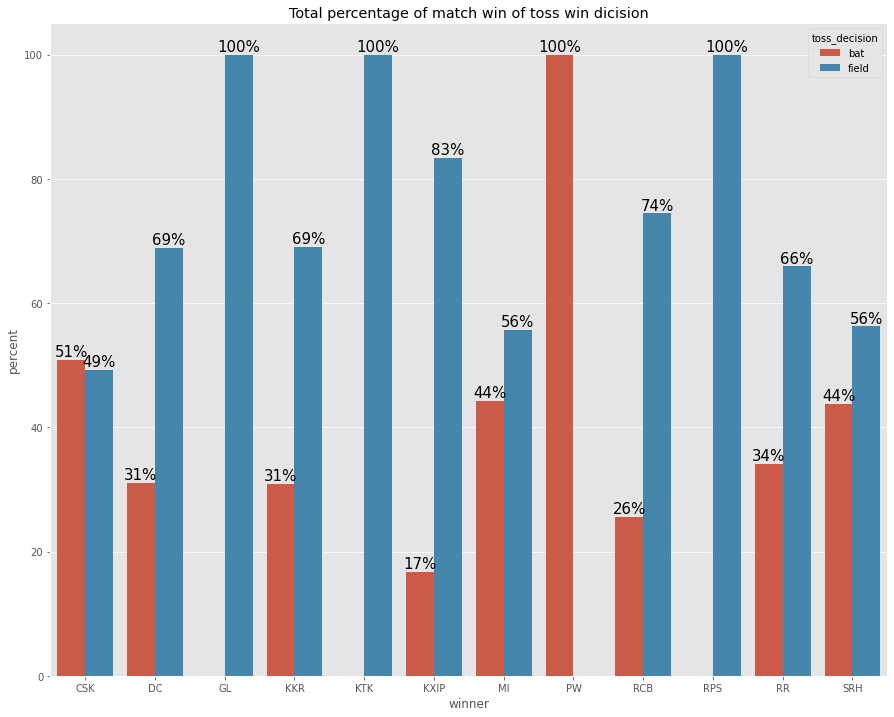

In [14]:
plt.figure(figsize=(15,12))
win=sns.barplot(x='winner',y='percent',data=Team_MTW,hue='toss_decision')
for count in win.patches:
    
    win.annotate(format(count.get_height(), '.0f')+'%', 
                   (count.get_x() + count.get_width() / 2, 
                    count.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Total percentage of match win of toss win dicision")

In [15]:
team=pd.concat([df_match['team1'],df_match['team2']])

In [16]:
team=team.value_counts().reset_index()
team

,index,0
0,MI,203
1,SRH,199
2,RCB,195
3,DC,194
4,KKR,192
5,KXIP,190
6,CSK,178
7,RR,161
8,PW,46
9,RPS,30


In [17]:
team.columns=['Team',"Total Match"]

In [18]:
team['Wins']=df_match['winner'].value_counts().reset_index()['winner']


In [19]:
team['WP']=round(team['Wins']/team['Total Match']*100,2)

In [20]:
team.to_csv('Final.csv',index=False)